In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_excel('C:\\Users\\Harshit Reddy\\Downloads\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [27]:
df.shape

(10683, 11)

We have 10683 rows and 11 columns.

In [28]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We have object type values in all the columns and int type value is present in price column which is our target variable.

# To check missing values

In [29]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Here, there are missing values present in route and total_stops columns.

<AxesSubplot:>

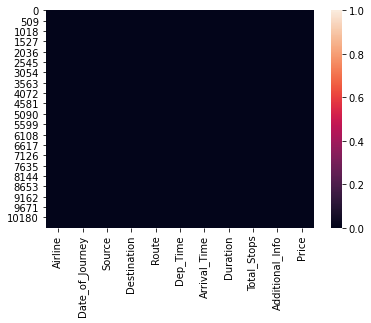

In [30]:
sns.heatmap(df.isnull())

In [31]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Route']=si.fit_transform(df['Route'].values.reshape(-1,1))
df['Total_Stops']=si.fit_transform(df['Total_Stops'].values.reshape(-1,1))
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [32]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now, we have no missing values.

<AxesSubplot:>

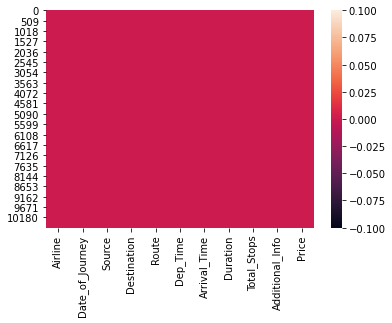

In [33]:
sns.heatmap(df.isnull())

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,8,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,8,7662
2,4,9/06/2019,2,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,8,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,8,6218
4,3,01/03/2019,0,5,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,CCU → BLR,19:55,22:25,2h 30m,non-stop,8,4107
10679,1,27/04/2019,3,0,CCU → BLR,20:45,23:20,2h 35m,non-stop,8,4145
10680,4,27/04/2019,0,2,BLR → DEL,08:20,11:20,3h,non-stop,8,7229
10681,10,01/03/2019,0,5,BLR → DEL,11:30,14:10,2h 40m,non-stop,8,12648


In [35]:
df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops'],axis=1,inplace=True)
df

,Airline,Source,Destination,Additional_Info,Price
0,3,0,5,8,3897
1,1,3,0,8,7662
2,4,2,1,8,13882
3,3,3,0,8,6218
4,3,0,5,8,13302
...,...,...,...,...,...
10678,0,3,0,8,4107
10679,1,3,0,8,4145
10680,4,0,2,8,7229
10681,10,0,5,8,12648


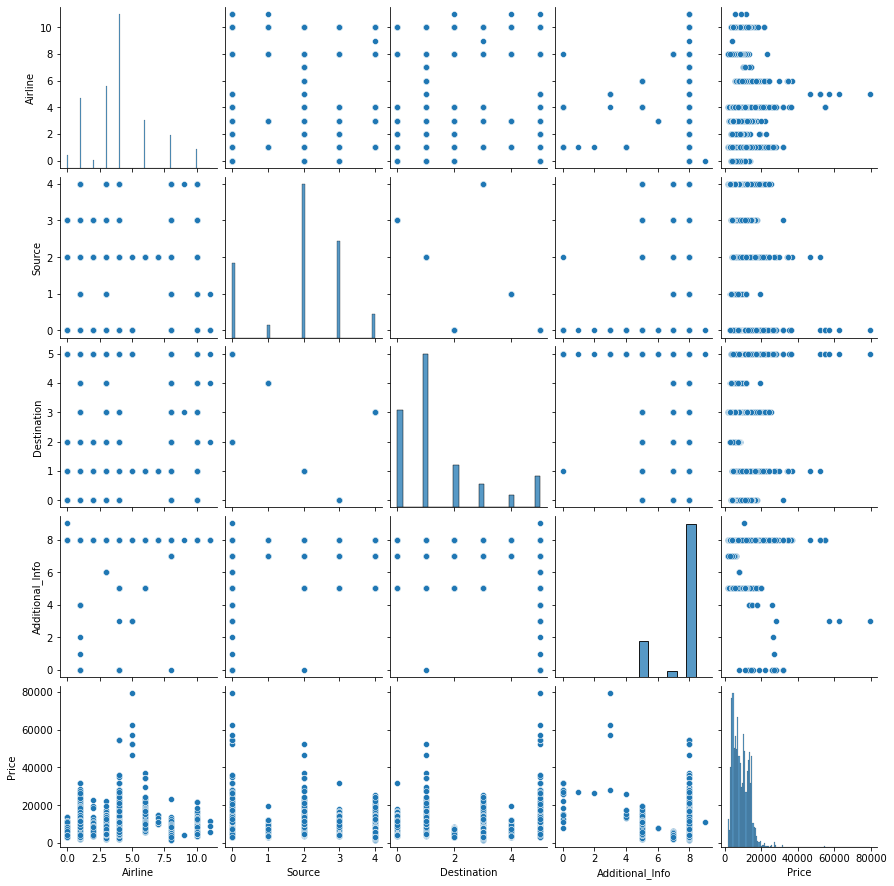

In [37]:
sns.pairplot(df)

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.41067545, 1.65844074, 2.41666505, 0.49989167, 1.12554821],
       [1.26099927, 0.89005213, 0.97382594, 0.49989167, 0.30904789],
       [0.01448647, 0.04055451, 0.29572775, 0.49989167, 1.03985835],
       ...,
       [0.01448647, 1.65844074, 0.38237045, 0.49989167, 0.40295085],
       [2.56545795, 1.65844074, 2.41666505, 0.49989167, 0.77224576],
       [1.26099927, 0.04055451, 0.29572775, 0.49989167, 0.57815073]])

In [39]:
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,

In [40]:
df1=df[(z<3).all(axis=1)]
df1

,Airline,Source,Destination,Additional_Info,Price
0,3,0,5,8,3897
1,1,3,0,8,7662
2,4,2,1,8,13882
3,3,3,0,8,6218
4,3,0,5,8,13302
...,...,...,...,...,...
10678,0,3,0,8,4107
10679,1,3,0,8,4145
10680,4,0,2,8,7229
10681,10,0,5,8,12648


In [41]:
df.shape

(10683, 5)

In [42]:
df1.shape

(10578, 5)

In [43]:
10683-10578

105

Here 105 rows have been removed since there were outliers present in it.

In [44]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

In [45]:
x

,Airline,Source,Destination,Additional_Info
0,3,0,5,8
1,1,3,0,8
2,4,2,1,8
3,3,3,0,8
4,3,0,5,8
...,...,...,...,...
10678,0,3,0,8
10679,1,3,0,8
10680,4,0,2,8
10681,10,0,5,8


In [46]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10578, dtype: int64

In [48]:
x.shape

(10578, 4)

In [49]:
y.shape

(10578,)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [52]:
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    score=mod.score(x_train,y_train)
    if score>maxAcc:
        maxAcc=score
        maxRS=i
print('The best accuracy is',maxAcc,'on random state',maxRS)        

The best accuracy is 0.6855064697099313 on random state 53


In [53]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.03372061594909259

In [54]:
pred=lm.predict(x_test)
print('Predicted data',pred)
print('Actual data',y_test)

Predicted data [9388.65837268 7752.77269706 9164.84859436 ... 9049.81568393 9388.65837268
 8877.26631828]
Actual data 2241    12373
8893     8040
2589    11491
9216    13292
4071     4174
        ...  
2239    10953
2375    10262
63       7191
497      5406
8993     7005
Name: Price, Length: 3385, dtype: int64


In [55]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

16247021.723177344
3379.713163411776
Root mean squared error 4030.759447446268
0.03483955393942051


In [56]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

0.6643990328471947

In [57]:
pred=dtr.predict(x_test)
print('Predicted data',pred)
print('Actual data',y_test)

Predicted data [10784.71711712  7525.18181818  9901.9295499  ...  7200.39641434
 10784.71711712 10756.12600536]
Actual data 2241    12373
8893     8040
2589    11491
9216    13292
4071     4174
        ...  
2239    10953
2375    10262
63       7191
497      5406
8993     7005
Name: Price, Length: 3385, dtype: int64


In [58]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

5323041.085633648
1605.7273091623595
Root mean squared error 2307.171663668234
0.6837827390062582


In [59]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.5038370860718684

In [60]:
pred=knn.predict(x_test)
print('Predicted data',pred)
print('Actual data',y_test)

Predicted data [ 9900.          8040.         10699.33333333 ...  6045.33333333
  9900.         14868.66666667]
Actual data 2241    12373
8893     8040
2589    11491
9216    13292
4071     4174
        ...  
2239    10953
2375    10262
63       7191
497      5406
8993     7005
Name: Price, Length: 3385, dtype: int64


In [61]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

7488589.7211226
1818.3617922205808
Root mean squared error 2736.528772208069
0.5551375065072617


In [62]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.6643761459366831

In [63]:
pred=rf.predict(x_test)
print('Predicted data',pred)
print('Actual data',y_test)

Predicted data [10765.83847379  7513.35122809  9914.7172306  ...  7204.48113092
 10765.83847379 10771.99905337]
Actual data 2241    12373
8893     8040
2589    11491
9216    13292
4071     4174
        ...  
2239    10953
2375    10262
63       7191
497      5406
8993     7005
Name: Price, Length: 3385, dtype: int64


In [64]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

5321074.796299913
1605.2569073536802
Root mean squared error 2306.745498814274
0.6838995471648712


These scores can be because of overfitting. Lets check with cross validation.

# Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())

[0.04487909 0.03312872 0.02239381 0.0273416  0.03586287]
0.03272121909914192


In [72]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())

[0.67509027 0.67453671 0.6529775  0.64514294 0.68548795]
0.6666470736677621


In [73]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.60953938 0.62993439 0.56039885 0.52461867 0.58535496]
0.5819692505405334


In [74]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.67492959 0.67473521 0.65316203 0.64548572 0.68529944]
0.6667223977115907


The least difference between the r2_score and cv score says that decision tree regressor model is working better.

# Hyper Parameter Tuning

We use this technique to improve the accuracy of the best model that we have choosen.

In [75]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','friedman_mse','mae','poisson'],
            'splitter':['best','random'],
            'max_depth':range(2,20,2),
            'max_features':['auto','sqrt','log2']}
gs=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(2, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [76]:
print(gs.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'sqrt', 'splitter': 'best'}


In [78]:
dtrmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=8,max_features='sqrt',splitter='best')
dtrmodel.fit(x_train,y_train)
score=dtr.score(x_train,y_train)
print(score*100)

66.43990328471946


# Saving the model

In [79]:
import joblib
joblib.dump(dtrmodel,'dtrmodel.obj')

['dtrmodel.obj']

# Testing the model

In [80]:
df2=pd.read_excel('C:\\Users\\Harshit Reddy\\Downloads\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Test_set.xlsx')
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [81]:
df2.shape

(2671, 10)

We have 2671 rows and 10 columns.

In [82]:
df2.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

We have object type values present in all the columns.

# To check missing values

In [83]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

We have no missing values.

<AxesSubplot:>

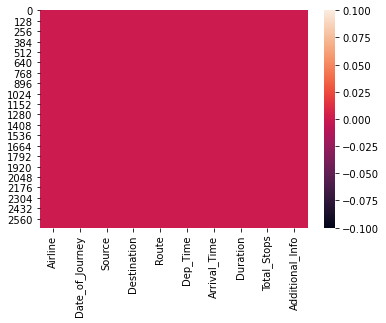

In [84]:
sns.heatmap(df2.isnull())

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['Airline']=le.fit_transform(df2['Airline'])
df2['Source']=le.fit_transform(df2['Source'])
df2['Destination']=le.fit_transform(df2['Destination'])
df2['Additional_Info']=le.fit_transform(df2['Additional_Info'])
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,2,1,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,5
1,3,12/05/2019,3,0,CCU → MAA → BLR,06:20,10:20,4h,1 stop,5
2,4,21/05/2019,2,1,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,3
3,6,21/05/2019,2,1,DEL → BOM → COK,08:00,21:00,13h,1 stop,5
4,0,24/06/2019,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,5
...,...,...,...,...,...,...,...,...,...,...
2666,1,6/06/2019,3,0,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,5
2667,3,27/03/2019,3,0,CCU → BLR,14:20,16:55,2h 35m,non-stop,5
2668,4,6/03/2019,2,1,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,5
2669,1,6/03/2019,2,1,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,5


In [86]:
df2.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops'],axis=1,inplace=True)
df2

,Airline,Source,Destination,Additional_Info
0,4,2,1,5
1,3,3,0,5
2,4,2,1,3
3,6,2,1,5
4,0,0,2,5
...,...,...,...,...
2666,1,3,0,5
2667,3,3,0,5
2668,4,2,1,5
2669,1,2,1,5


In [87]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[0.01190758, 0.03256662, 0.29488167, 0.48039397],
       [0.42377921, 0.87708559, 0.97622158, 0.48039397],
       [0.01190758, 0.03256662, 0.29488167, 2.14897547],
       ...,
       [0.01190758, 0.03256662, 0.29488167, 0.48039397],
       [1.29515278, 0.03256662, 0.29488167, 0.48039397],
       [0.88328115, 0.03256662, 0.29488167, 0.48039397]])

In [88]:
print(np.where(z>3))

(array([ 954, 1802, 1861], dtype=int64), array([3, 3, 3], dtype=int64))


In [89]:
df3=df2[(z<3).all(axis=1)]
df3

,Airline,Source,Destination,Additional_Info
0,4,2,1,5
1,3,3,0,5
2,4,2,1,3
3,6,2,1,5
4,0,0,2,5
...,...,...,...,...
2666,1,3,0,5
2667,3,3,0,5
2668,4,2,1,5
2669,1,2,1,5


In [90]:
df2.shape

(2671, 4)

In [91]:
df3.shape

(2668, 4)

Here, 3 rows have been removed since there were outliers present in it.

In [95]:
LinearReg=LinearRegression()
LinearReg.fit(x_train,y_train)

LinearRegression()

In [96]:
pred=LinearReg.predict(x_test)
pred

array([9388.65837268, 7752.77269706, 9164.84859436, ..., 9049.81568393,
       9388.65837268, 8877.26631828])

In [97]:
DecisionTreeReg=DecisionTreeRegressor()
DecisionTreeReg.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
pred=DecisionTreeReg.predict(x_test)
pred

array([10784.71711712,  7525.18181818,  9901.9295499 , ...,
        7200.39641434, 10784.71711712, 10756.12600536])

In [99]:
KNeighborsReg=KNeighborsRegressor()
KNeighborsReg.fit(x_train,y_train)

KNeighborsRegressor()

In [100]:
pred=KNeighborsReg.predict(x_test)
pred

array([ 9049. ,  7567.6,  9737. , ...,  6214.8,  9049. , 13166.2])

In [102]:
RandomforestReg=RandomForestRegressor()
RandomforestReg.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
pred=RandomforestReg.predict(x_test)
pred

array([10789.2023876 ,  7472.83281428,  9936.25700887, ...,
        7196.29484408, 10789.2023876 , 10745.73920731])